In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:>

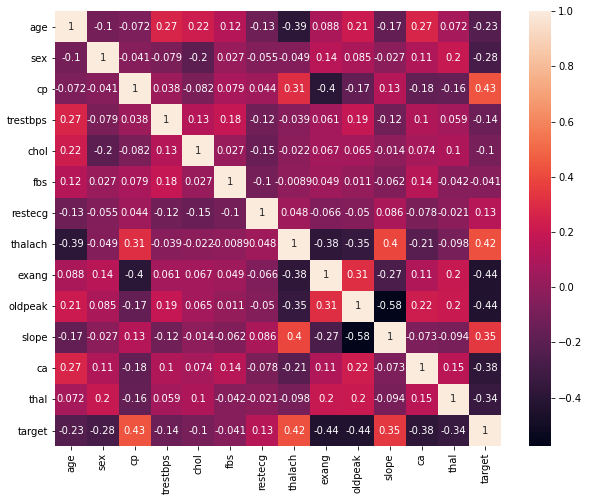

In [6]:
f, ax = plt.subplots(1, figsize=(10,8))
sns.heatmap(data.corr(), annot=True, ax=ax)

In [7]:
#set plot features
sns.set(style = 'darkgrid', color_codes = True) 
def setPlt():
    f, ax = plt.subplots(figsize = (13,9))
    sns.despine(f, left = True, bottom = True)

C:\Users\TruProjects\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


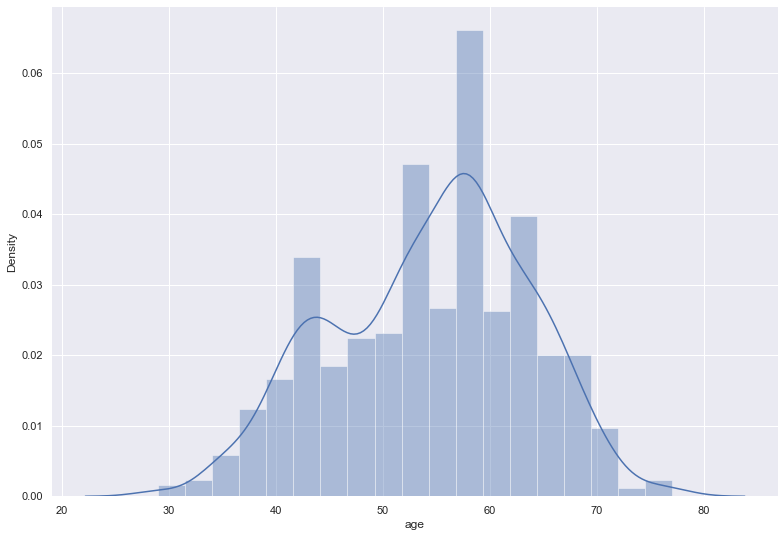

In [8]:
#create plot, a histogram of cost of living index
setPlt()
hist = sns.distplot(data['age'])

<AxesSubplot:xlabel='target', ylabel='count'>

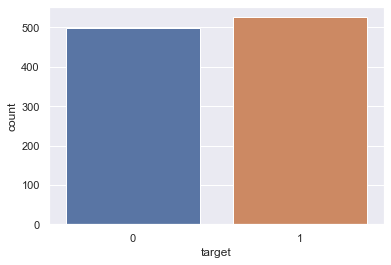

In [9]:
sns.countplot(x=data['target'])

In [10]:
data.shape

(1025, 14)

# FEature Selection

In [11]:
Y = data['target']
X = data.drop('target',1)

# SFS

In [12]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=6)

sfs.fit(X, Y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[sfs.support_]))

Selected features: ['sex', 'chol', 'fbs', 'restecg', 'thalach', 'ca']


In [13]:
Selected_features = ['cp', 'chol', 'exang', 'oldpeak', 'ca', 'thal']
X = data[Selected_features]

In [14]:
X

,cp,chol,exang,oldpeak,ca,thal
0,0,212,0,1.0,2,3
1,0,203,1,3.1,0,3
2,0,174,1,2.6,0,3
3,0,203,0,0.0,1,3
4,0,294,0,1.9,3,2
...,...,...,...,...,...,...
1020,1,221,1,0.0,0,2
1021,0,258,1,2.8,1,3
1022,0,275,1,1.0,1,2
1023,0,254,0,0.0,0,2


In [15]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# SVM

In [17]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X, Y)
predictions = SVM.predict(X)
val1 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for SVM: ", val1, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(Y, predictions))
print("*Classification Report for SVM: ")
print(classification_report(Y, predictions))

*Accuracy score for SVM:  57.26829268292683 

*Confusion Matrix for SVM: 
[[203 296]
 [142 384]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.59      0.41      0.48       499
           1       0.56      0.73      0.64       526

    accuracy                           0.57      1025
   macro avg       0.58      0.57      0.56      1025
weighted avg       0.58      0.57      0.56      1025



In [18]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=2)

score = cross_val_score(SVM, X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.59064327 0.54882812]
Average score: 0.57


# Decision Tree - J48

In [19]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth =3, random_state = 42)
DT.fit(X, Y)
predictions = DT.predict(X)
val2 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for DT: ", val2, "\n")
print("*Confusion Matrix for DT: ")
print(confusion_matrix(Y, predictions))
print("*Classification Report for DT: ")
print(classification_report(Y, predictions))

*Accuracy score for DT:  83.51219512195122 

*Confusion Matrix for DT: 
[[363 136]
 [ 33 493]]
*Classification Report for DT: 
              precision    recall  f1-score   support

           0       0.92      0.73      0.81       499
           1       0.78      0.94      0.85       526

    accuracy                           0.84      1025
   macro avg       0.85      0.83      0.83      1025
weighted avg       0.85      0.84      0.83      1025



In [20]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=2)

score = cross_val_score(DT, X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.83235867 0.8359375 ]
Average score: 0.83


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X, Y)
predictions = RF.predict(X)
val3 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for RF: ", val3, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(Y, predictions))
print("*Classification Report for RF: ")
print(classification_report(Y, predictions))

*Accuracy score for RF:  100.0 

*Confusion Matrix for RF: 
[[499   0]
 [  0 526]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025



In [22]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=2)

score = cross_val_score(RF, X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.98245614 0.94726562]
Average score: 0.96


# MLP - ANN

In [23]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier()
MLP.fit(X, Y)
predictions = MLP.predict(X)
val4 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for MLP: ", val4, "\n")
print("*Confusion Matrix for MLP: ")
print(confusion_matrix(Y, predictions))
print("*Classification Report for MLP: ")
print(classification_report(Y, predictions))

*Accuracy score for MLP:  78.53658536585367 

*Confusion Matrix for MLP: 
[[440  59]
 [161 365]]
*Classification Report for MLP: 
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       499
           1       0.86      0.69      0.77       526

    accuracy                           0.79      1025
   macro avg       0.80      0.79      0.78      1025
weighted avg       0.80      0.79      0.78      1025



In [24]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=2)

score = cross_val_score(MLP, X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.80311891 0.80664062]
Average score: 0.80


# SMO

In [25]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
clf.fit(X, Y)
predictions = clf.predict(X)
val5 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for SMO: ", val5, "\n")
print("*Confusion Matrix for SMO: ")
print(confusion_matrix(Y, predictions))
print("*Classification Report for SMO: ")
print(classification_report(Y, predictions))

*Accuracy score for SMO:  81.7560975609756 

*Confusion Matrix for SMO: 
[[373 126]
 [ 61 465]]
*Classification Report for SMO: 
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       499
           1       0.79      0.88      0.83       526

    accuracy                           0.82      1025
   macro avg       0.82      0.82      0.82      1025
weighted avg       0.82      0.82      0.82      1025



C:\Users\TruProjects\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [26]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=2)

score = cross_val_score(clf, X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.80701754 0.80664062]
Average score: 0.81


# GradientBoosting Classifier

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GBC.fit(X, Y)
predictions = GBC.predict(X)
val6 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for GBC: ", val6, "\n")
print("*Confusion Matrix for GBC: ")
print(confusion_matrix(Y, predictions))
print("*Classification Report for GBC: ")
print(classification_report(Y, predictions))

*Accuracy score for GBC:  91.51219512195122 

*Confusion Matrix for GBC: 
[[442  57]
 [ 30 496]]
*Classification Report for GBC: 
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       499
           1       0.90      0.94      0.92       526

    accuracy                           0.92      1025
   macro avg       0.92      0.91      0.91      1025
weighted avg       0.92      0.92      0.92      1025



In [28]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=2)

score = cross_val_score(GBC, X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.88304094 0.88476562]
Average score: 0.88


# LDA

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X, Y)
predictions = LDA.predict(X)
val7 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for LDA: ", val7, "\n")
print("*Confusion Matrix for LDA: ")
print(confusion_matrix(Y, predictions))
print("*Classification Report for LDA: ")
print(classification_report(Y, predictions))

*Accuracy score for LDA:  81.5609756097561 

*Confusion Matrix for LDA: 
[[366 133]
 [ 56 470]]
*Classification Report for LDA: 
              precision    recall  f1-score   support

           0       0.87      0.73      0.79       499
           1       0.78      0.89      0.83       526

    accuracy                           0.82      1025
   macro avg       0.82      0.81      0.81      1025
weighted avg       0.82      0.82      0.81      1025



In [30]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=2)

score = cross_val_score(LDA, X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.8128655  0.80273438]
Average score: 0.81


# KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X, Y)
predictions = KNN.predict(X)
val8 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for KNN: ", val8, "\n")
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(Y, predictions))
print("*Classification Report for KNN: ")
print(classification_report(Y, predictions))

*Accuracy score for KNN:  100.0 

*Confusion Matrix for KNN: 
[[499   0]
 [  0 526]]
*Classification Report for KNN: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025



In [32]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=2)

score = cross_val_score(KNN, X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.83625731 0.83007812]
Average score: 0.83


# XGBoost

In [33]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X, Y)
predictions = xgb_model.predict(X)
val9 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for XGB: ", val9, "\n")
print("*Confusion Matrix for XGB: ")
print(confusion_matrix(Y, predictions))
print("*Classification Report for XGB: ")
print(classification_report(Y, predictions))

*Accuracy score for XGB:  100.0 

*Confusion Matrix for XGB: 
[[499   0]
 [  0 526]]
*Classification Report for XGB: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025



In [34]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=2)

score = cross_val_score(xgb_model, X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.97076023 0.93359375]
Average score: 0.95


# Voting Classifier

In [35]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
clf1 = SVC(gamma='auto')
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = DecisionTreeClassifier()
eclf1 = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')
eclf1.fit(X, Y)
predictions = eclf1.predict(X)
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(Y, predictions))

*Confusion Matrix for Voting Classifier: 
[[499   0]
 [  0 526]]


In [36]:
val10 = (accuracy_score(Y, predictions)*100)
print("*Accuracy score for Voting: ", val10, "\n")
print("*Classification Report for Voting: ")
print(classification_report(Y, predictions))

*Accuracy score for Voting:  100.0 

*Classification Report for Voting: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       499
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1025
   macro avg       1.00      1.00      1.00      1025
weighted avg       1.00      1.00      1.00      1025



In [37]:
#cross validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold
kf = KFold(n_splits=2)

score = cross_val_score(eclf1, X, Y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.95906433 0.94921875]
Average score: 0.95


# Comparison - SFS Accuracy 

In [38]:
score = [val1,val2,val3,val4,val5,val6,val7,val8,val9,val10]

In [39]:
#make variabel for save the result and to show it
classifier = ('SVM','RF','DT-J48','MLP-ANN','SMO','GBC','LDA','KNN','XGB','Voting')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4 5 6 7 8 9]
[57.26829268292683, 83.51219512195122, 100.0, 78.53658536585367, 81.7560975609756, 91.51219512195122, 81.5609756097561, 100.0, 100.0, 100.0]


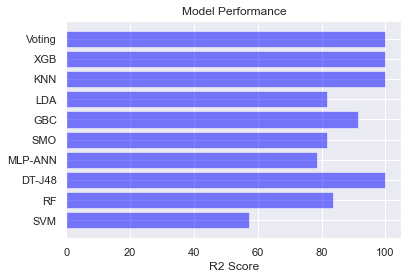

In [40]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('R2 Score')
plt2.title('Model Performance')
plt2.show()